In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import os

In [2]:

def p2_create_array(boris_df, times, order, min_iti, min_bout):
    familiarization_df = boris_df[(boris_df['Start (s)'] > times[0])]
    baseline_df = boris_df[(boris_df['Start (s)'] > times[1]) & (boris_df['Start (s)'] < times[2])]
    if order[0] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[0] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[0] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[1] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[1] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[1] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[2] == 'familiar':
        recall_df = boris_df[boris_df['Start (s)'] > times[7]]
    if order[2] == 'novel':
        novel_df = boris_df[boris_df['Start (s)'] > times[7]]
    if order[2] == 'cagemate':
        cagemate_df = boris_df[boris_df['Start (s)'] > times[7]]

    acquisition_array = boris.get_behavior_bouts(familiarization_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    recall_array = boris.get_behavior_bouts(recall_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    cagemate_array = boris.get_behavior_bouts(cagemate_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    novel_array = boris.get_behavior_bouts(novel_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)

    return [acquisition_array, recall_array, cagemate_array, novel_array]

def p2_make_assignment(recording, subject, event_arrays):
    event_dict = {'acquisition': event_arrays[0], 'recall':event_arrays[1], 'cagemate':event_arrays[2], 'novel': event_arrays[3]}
    recording.event_dict = event_dict
    recording.subject = subject

def p2_camera_crash(boris_df1, boris_df2, times1, times2, order, media_duration, last_timestamp, min_iti, min_bout):
    array_1 = p2_create_array(boris_df1, times1, order, min_iti, min_bout)
    array_2 = p2_create_array(boris_df2, times2, order, min_iti, min_bout)
    diff = (last_timestamp / 20000 * 1000) - (media_duration)
    final_arrays = []
    for i in range(len(array_1)):
        array_2[i] = array_2[i] + diff
        new_array = np.concatenate([array_1[i], array_2[i]])
        final_arrays.append(new_array)
    return final_arrays
    
       
      
   

phase2_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 2")
with open('phase2_collection.pkl','wb') as file:
    pickle.dump(phase2_collection, file)

In [3]:
with open('phase2_collection.pkl', 'rb') as file:
    phase2_collection = pickle.load(file)
phase2_collection.collection.keys()

dict_keys(['20230803_101331_1_merged.rec', '20230803_121318_1_merged.rec', '20230803_141047_1_merged.rec', '20230804_121600_1_merged.rec', '20230804_141009_1_merged.rec', '20230817_100823_1_merged.rec', '20230817_113746_1_merged.rec', '20230818_115728_1_merged.rec', '20230818_133620_1_merged.rec'])

In [4]:
phase2_collection.collection.keys()
FCN_1_1 = phase2_collection.get_by_name('20230803_101331_1_merged.rec')
CNF_1_1 = phase2_collection.get_by_name('20230817_100823_1_merged.rec')
NFC_1_1 = phase2_collection.get_by_name('20230818_115728_1_merged.rec')

NFC_1_2 = phase2_collection.get_by_name('20230804_141009_1_merged.rec')
FCN_1_2 = phase2_collection.get_by_name('20230817_113746_1_merged.rec')
CNF_1_2 = phase2_collection.get_by_name('20230803_141047_1_merged.rec')
                                        
FCN_1_4 = phase2_collection.get_by_name('20230804_121600_1_merged.rec')
NFC_1_4 = phase2_collection.get_by_name('20230803_121318_1_merged.rec')
CNF_1_4 = phase2_collection.get_by_name('20230818_133620_1_merged.rec')


In [5]:
#ONE VIDEO
#20230817_100823_1.1_CNF
CNF_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_100823_1_merged.rec\\20230817_100823_1.1_CNF.xlsx")
times_CNF_1_1 = [630, 633, 1226, 1228, 1526, 1531, 1828, 1832]
order_CNF_1_1 = ['cagemate', 'novel', 'familiar']

CNF_1_1_arrays = p2_create_array(CNF_1_1_boris_df, times_CNF_1_1, order_CNF_1_1, 2, 0.5)
p2_make_assignment(CNF_1_1, '1.1', CNF_1_1_arrays)

#TWO VIDEOS
#20230803_101331_1_FCN_1
FCN_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.1.xlsx")
FCN_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.2.xlsx")
times_FCN_1_1_1 = [599, 603, 821, 0, 0, 0, 0, 0]
times_FCN_1_1_2 = [0, 0, 374, 377, 671, 677, 970, 976]
order_FCN_1_1 = ['familiar', 'cagemate', 'novel']
FCN_1_1_media_duration = 1290.567 * 1000
FCN_1_1_last_timestamp = FCN_1_1.timestamps_var[-1]

FCN_1_1_arrays = p2_camera_crash(FCN_1_1_1_boris_df, FCN_1_1_2_boris_df, times_FCN_1_1_1, times_FCN_1_1_2, order_FCN_1_1, FCN_1_1_media_duration, FCN_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(FCN_1_1, '1.1', FCN_1_1_arrays)

#20230818_115728_1.1_NFC
NFC_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.1.xlsx")
NFC_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.2.xlsx")
times_NFC_1_1_1 = [111, 0, 0, 0, 0, 0, 0, 0, 0]
times_NFC_1_1_2 = [527, 533, 1147, 1151, 1446, 1454, 1754, 1762]
order_NFC_1_1 = ['novel', 'familiar', 'cagemate']
NFC_1_1_media_duration = 2059.6 * 1000
NFC_1_1_last_timestamp = NFC_1_1.timestamps_var[-1]

NFC_1_1_arrays = p2_camera_crash(NFC_1_1_1_boris_df, NFC_1_1_2_boris_df, times_NFC_1_1_1, times_NFC_1_1_2, order_NFC_1_1, NFC_1_1_media_duration, NFC_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_1, '1.1', NFC_1_1_arrays)


#20230704_141009_1.2_NFC8
NFC_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_141009_1_merged.rec\\20230804_141009_1.2_2t2bL_NFC.xlsx")
times_NFC_1_2 = [600, 606, 1199, 1202, 1500, 1508, 1800, 1806]
order_NFC_1_2 = ['novel', 'familiar', 'cagemate']

NFC_1_2_arrays = p2_create_array(NFC_1_2_boris_df, times_NFC_1_2, order_NFC_1_2, 2, 0.5)
p2_make_assignment(NFC_1_2, '1.2', NFC_1_2_arrays)


#20230817_113746_1.2_FCN
FCN_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_113746_1_merged.rec\\20230817_113746_1.2_2t2bL_FCN.xlsx")
times_FCN_1_2 = [599, 604, 1200, 1203, 1499, 1506, 1811, 1817]
order_FCN_1_2 = ['familiar', 'cagemate', 'novel']

FCN_1_2_arrays = p2_create_array(FCN_1_2_boris_df, times_FCN_1_2, order_FCN_1_2, 2, 0.5)
p2_make_assignment(FCN_1_2, '1.2', FCN_1_2_arrays)

#20230803_141047_1.2_CNF
CNF_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_141047_1_merged.rec\\20230803 _ 141047 _1.2 2t2bL CNF .xlsx")
times_CNF_1_2 = [600, 605, 1200, 1203, 1500, 1506, 1800, 1806]
order_CNF_1_2 = ['cagemate', 'novel', 'familiar']

CNF_1_2_arrays = p2_create_array(CNF_1_2_boris_df, times_CNF_1_2, order_CNF_1_2, 2, 0.5)
p2_make_assignment(CNF_1_2, '1.2', CNF_1_2_arrays)

#20230804_121600_1.4_FCN
FCN_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_121600_1_merged.rec\\20230804_121600_1.4_3t3bL_FCN.xlsx")
times_FCN_1_4 = [600, 607, 1203, 1206, 1499, 1505, 1799, 1807]
order_FCN_1_4 = ['familiar', 'cagemate', 'novel']

FCN_1_4_arrays = p2_create_array(FCN_1_4_boris_df, times_FCN_1_4, order_FCN_1_4, 2, 0.5)
p2_make_assignment(FCN_1_4, '1.4', FCN_1_4_arrays)

#20230818_133620_1.4_CNF
CNF_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_133620_1_merged.rec\\20230818_133620_1.4_3t3bL_CNF.xlsx")
times_CNF_1_4 = [599, 605, 1158, 1202, 1497, 1503, 1800, 1806]
order_CNF_1_4 = ['cagemate', 'familiar', 'novel']

CNF_1_4_arrays = p2_create_array(CNF_1_4_boris_df, times_CNF_1_4, order_CNF_1_4, 2, 0.5)
p2_make_assignment(CNF_1_4, '1.4', CNF_1_4_arrays)


#20230803_121318_1.4_NFC
NFC_1_4_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.1.xlsx")
NFC_1_4_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.2.xlsx")
times_NFC_1_4_1 = [599, 604, 1021, 0, 0, 0, 0, 0]
times_NFC_1_4_2 =  [0, 0, 50, 53, 347, 354, 650, 656]
order_NFC_1_4 = ['novel', 'familiar', 'cagemate']
NFC_1_4_media_duration = 951.633 * 1000
NFC_1_4_last_timestamp = NFC_1_4.timestamps_var[-1]

NFC_1_4_arrays = p2_camera_crash(NFC_1_4_1_boris_df, NFC_1_4_2_boris_df, times_NFC_1_4_1, times_NFC_1_4_2, order_NFC_1_4, NFC_1_4_media_duration, NFC_1_4_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_4, '1.4', NFC_1_4_arrays)




In [6]:
phase2_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, 100, 50, 0.5)


All set to analyze


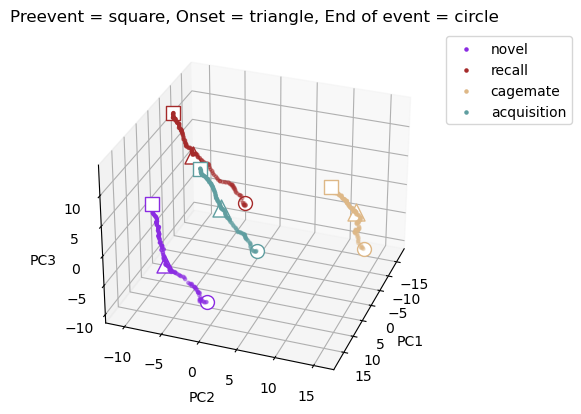

In [7]:
phase2_analysis.PCA_trajectories(3, 2, d = 3, events = ['novel', 'recall', 'cagemate', 'acquisition'], save = True)

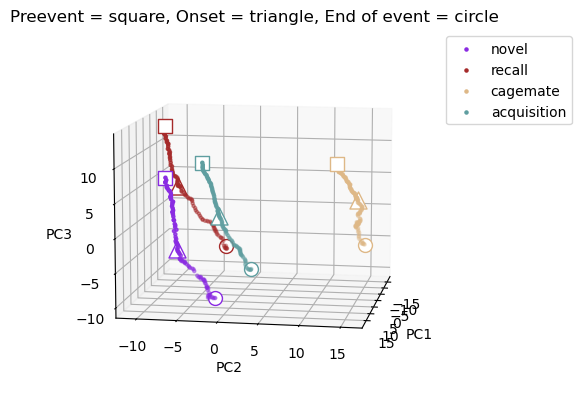

In [9]:
phase2_analysis.PCA_trajectories(3, 2, d = 3, events = ['novel', 'recall', 'cagemate', 'acquisition'], save = True, azim=10, elev=10)

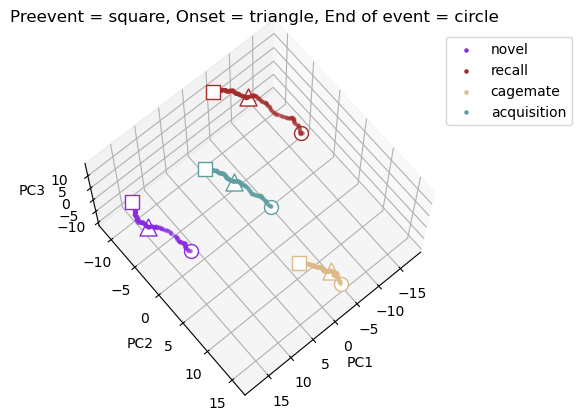

In [15]:
phase2_analysis.PCA_trajectories(3, 2, d = 3, events = ['novel', 'recall', 'cagemate', 'acquisition'], save = True, azim=70, elev=50)

In [8]:
for event in ['acquisition', 'recall', 'novel', 'cagemate']:    
    phase2_analysis.wilcox_baseline_v_event_collection(event, 2, 3, plot = False, save = True)



c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

In [9]:
phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.6706495098039216, 0.4270494022114163, [[11, 204], [16, 199]])

In [10]:
phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', 3, 2, save = True)


(1.593688362919132, 0.2768895587963544, [[20, 195], [13, 202]])

In [11]:
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.5156818575636805, 0.057715781437909675, [[16, 199], [29, 186]])

In [12]:
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.4663541092112521, 0.014291537472534355, [[19, 196], [37, 178]])

In [13]:
phase2_analysis.fishers_exact_wilcox('novel', 'acquisition', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.4934164934164934, 0.022244289085416858, [[20, 195], [37, 178]])

In [14]:
phase2_analysis.fishers_exact_wilcox('novel', 'acquisition', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.345841784989858, 0.004257165706374724, [[11, 204], [29, 186]])

In [15]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.797773654916512, 0.18438248862508305, [[19, 196], [11, 204]])

In [16]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.0, 1.0, [[16, 199], [16, 199]])

In [17]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 3, 2, save= True)

(1.593688362919132, 0.2768895587963544, [[20, 195], [13, 202]])

In [18]:
event_info = {}
for recording_name, recording in phase2_collection.collection.items():
    for event, events in recording.event_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for sniff in events:
            sniff_length_temp = sniff[1] - sniff[0]
            sniff_length = sniff_length +sniff_length_temp
        total_sniff_time = sniff_length/1000
        avg_event = sniff_length/no_events/1000
        if (recording_name + recording.subject) in event_info.keys():
            dict_event = event_info[recording_name + recording.subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[recording_name + recording.subject] =  dict_event
        else:
            event_info[recording_name + recording.subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}


In [19]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_overview['order'] = ['FCN', 'FCN', 'FCN', 'NFC', 'NFC', 'NFC', 'CNF', 'CNF','CNF', 
                           'FCN', 'FCN', 'FCN', 'NFC', 'NFC','NFC', 'CNF', 'CNF', 'CNF',
                            'FCN','FCN', 'FCN', 'NFC', 'NFC','NFC', 'CNF', 'CNF', 'CNF' ]


In [20]:
no_events = event_overview[event_overview['level_1'] == 'no_events']
no_events

FCN_df = event_overview[event_overview['order'] == 'FCN']
CNF_df = event_overview[event_overview['order'] == 'CNF']
NFC_df = event_overview[event_overview['order'] == 'NFC']

In [21]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = event_total_time[event].mean()
    event_total_time_averages[event] = avg_event
event_total_time_averages

{'acquisition': 87.78733333333334,
 'recall': 29.52844444444442,
 'novel': 35.17255555555555,
 'cagemate': 29.90433333333336}

Text(0, 0.5, 'Total sniff (s)')

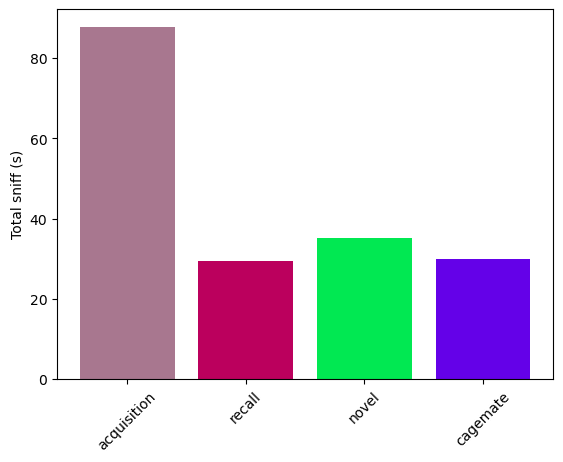

In [22]:
import matplotlib.pyplot as plt
colors = ['#A8778f', '#Bb005d','#01e852','#6401e8']
plt.bar(event_total_time_averages.keys(), event_total_time_averages.values(), color = colors)
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')


In [23]:
FCN_event_total_time = FCN_df[FCN_df['level_1'] == 'total time']
FCN_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = FCN_event_total_time[event].mean()
    FCN_event_total_time_averages[event] = avg_event
FCN_event_total_time_averages

{'acquisition': 66.39666666666666,
 'recall': 19.777333333333335,
 'novel': 33.821666666666665,
 'cagemate': 20.497333333333334}

In [24]:
NFC_event_total_time = NFC_df[NFC_df['level_1'] == 'total time']
NFC_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = NFC_event_total_time[event].mean()
    NFC_event_total_time_averages[event] = avg_event
NFC_event_total_time_averages

{'acquisition': 54.575000000000074,
 'recall': 17.57766666666667,
 'novel': 23.921000000000003,
 'cagemate': 25.830666666666744}

In [25]:
CNF_event_total_time = CNF_df[CNF_df['level_1'] == 'total time']
CNF_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = CNF_event_total_time[event].mean()
    CNF_event_total_time_averages[event] = avg_event
CNF_event_total_time_averages

{'acquisition': 142.39033333333325,
 'recall': 51.230333333333256,
 'novel': 47.775000000000006,
 'cagemate': 43.385}

In [26]:
CNF_df

,level_0,level_1,acquisition,recall,cagemate,novel,order
6,20230803_141047_1_merged.rec1.2,no_events,39.000000,14.000000,15.000000,10.000000,CNF
7,20230803_141047_1_merged.rec1.2,avg event,3.193795,2.942643,3.728400,2.743500,CNF
8,20230803_141047_1_merged.rec1.2,total time,124.558000,41.197000,55.926000,27.435000,CNF
15,20230817_100823_1_merged.rec1.1,no_events,74.000000,23.000000,23.000000,28.000000,CNF
16,20230817_100823_1_merged.rec1.1,avg event,3.332122,3.727174,2.247652,3.898429,CNF
17,20230817_100823_1_merged.rec1.1,total time,246.577000,85.725000,51.696000,109.156000,CNF
24,20230818_133620_1_merged.rec1.4,no_events,31.000000,12.000000,13.000000,6.000000,CNF
25,20230818_133620_1_merged.rec1.4,avg event,1.807613,2.230750,1.733308,1.122333,CNF
26,20230818_133620_1_merged.rec1.4,total time,56.036000,26.769000,22.533000,6.734000,CNF


In [27]:
phase2_analysis.export()

No z-scored events saved.


In [22]:
phase2_analysis.wilcox_event_v_event_collection('recall', 'cagemate', 3, 2, plot = False, save =True )
phase2_analysis.wilcox_event_v_event_collection('novel', 'recall', 3, 2, plot = False, save = True)
phase2_analysis.wilcox_event_v_event_collection('novel', 'cagemate', 3, 2, plot = False, save = True)

In [21]:
phase2_analysis.wilcox_event_v_event_collection('acquisition', 'novel', 3, 2, plot = False, save =True)
phase2_analysis.wilcox_event_v_event_collection('acquisition', 'recall', 3, 2, plot = False, save =True)

In [23]:
phase2_analysis.export()

No z-scored events saved.


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1324: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'event1 vs event2_x', 'Event_x', 'p value_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,


No fishers exact tests saved


In [80]:
wilcoxon_results = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\100sw_50msbin_wilcoxon.xlsx")


In [81]:
wilcoxon_results = wilcoxon_results[['original unit id',
 'Event_x',
 'event1 vs event2_x',
 'Event_y',
 'event1 vs event2_y',
 'Event_x.1',
 'event1 vs event2_x.1',
 'Event_y.1',
 'event1 vs event2_y.1',
 'Event',
 'event1 vs event2']]

In [82]:
wilcoxon_results.columns = ['original unit id',
 'Event_x',
 'acquisition vs novel',
 'Event_y',
 'acquisition vs recall',
 'Event_x.1',
 'recall vs cagemate',
 'Event_y.1',
 'novel vs recall',
 'Event',
 'novel vs cagemate']
wilcoxon_results = wilcoxon_results[['original unit id',
 'acquisition vs novel',
 'acquisition vs recall',
 'recall vs cagemate',
 'novel vs recall',
 'novel vs cagemate']]

def get_fam_score(acquisition_vs_novel, recall_vs_cagemate, novel_vs_recall, novel_vs_cagemate, acquisition_vs_recall):
    fam_score = 0
    if acquisition_vs_novel == 'not significant':
        if recall_vs_cagemate != 'not significant':
            fam_score +=1
        if novel_vs_recall != 'not significant':
            fam_score +=1
        if novel_vs_cagemate != 'not signicant':
            fam_score +=1
        if acquisition_vs_recall != 'not significant':
            fam_score += 2
    return fam_score

def get_id_score(acquisition_vs_novel, recall_vs_cagemate, novel_vs_recall, novel_vs_cagemate, acquisition_vs_recall):
    id_score = 0
    if acquisition_vs_recall == 'not significant':
        if recall_vs_cagemate != 'not significant':
            if novel_vs_cagemate != 'not signicant':
                id_score = 'cagemate'
        if novel_vs_recall != 'not significant':
           if recall_vs_cagemate != 'not significant':
                id_score = 'familiar'
        if novel_vs_recall != 'not significant':
            if novel_vs_cagemate != 'not significant':
                id_score = 'cagemate'
    return id_score



In [83]:
wilcoxon_results['fam score'] = wilcoxon_results.apply(lambda row: get_fam_score(row['acquisition vs novel'], row['recall vs cagemate'], row['novel vs recall'], row['novel vs cagemate'], row['acquisition vs recall']), axis = 1) 
wilcoxon_results['id score'] = wilcoxon_results.apply(lambda row: get_id_score(row['acquisition vs novel'], row['recall vs cagemate'], row['novel vs recall'], row['novel vs cagemate'], row['acquisition vs recall']), axis = 1) 


,original unit id,acquisition vs novel,acquisition vs recall,recall vs cagemate,novel vs recall,novel vs cagemate,fam score,id score
0,196,not significant,not significant,not significant,not significant,decreases,1,0
1,91,not significant,not significant,not significant,not significant,not significant,1,0
2,267,not significant,not significant,not significant,not significant,not significant,1,0
3,136,not significant,not significant,not significant,not significant,not significant,1,0
4,79,not significant,not significant,not significant,not significant,not significant,1,0
...,...,...,...,...,...,...,...,...
210,101,not significant,not significant,increases,not significant,not significant,2,cagemate
211,50,not significant,not significant,not significant,not significant,not significant,1,0
212,74,not significant,not significant,not significant,not significant,not significant,1,0
213,107,not significant,not significant,not significant,not significant,not significant,1,0


In [84]:
ID_score = wilcoxon_results[wilcoxon_results['id score'] != 0]
ID_score
    

,original unit id,acquisition vs novel,acquisition vs recall,recall vs cagemate,novel vs recall,novel vs cagemate,fam score,id score
15,200,not significant,not significant,increases,not significant,not significant,2,cagemate
27,113,not significant,not significant,increases,not significant,increases,2,cagemate
30,98,not significant,not significant,increases,not significant,increases,2,cagemate
38,133,not significant,not significant,decreases,not significant,not significant,2,cagemate
41,91,not significant,not significant,increases,not significant,not significant,2,cagemate
46,2,not significant,not significant,not significant,decreases,decreases,2,cagemate
47,15,not significant,not significant,not significant,decreases,decreases,2,cagemate
54,36,not significant,not significant,increases,not significant,not significant,2,cagemate
63,192,not significant,not significant,decreases,not significant,decreases,2,cagemate
74,174,not significant,not significant,decreases,not significant,not significant,2,cagemate


In [85]:
fam_df = wilcoxon_results[(wilcoxon_results['fam score'] > 0) & (wilcoxon_results['id score'] == 0)]
fam_df

,original unit id,acquisition vs novel,acquisition vs recall,recall vs cagemate,novel vs recall,novel vs cagemate,fam score,id score
0,196,not significant,not significant,not significant,not significant,decreases,1,0
1,91,not significant,not significant,not significant,not significant,not significant,1,0
2,267,not significant,not significant,not significant,not significant,not significant,1,0
3,136,not significant,not significant,not significant,not significant,not significant,1,0
4,79,not significant,not significant,not significant,not significant,not significant,1,0
...,...,...,...,...,...,...,...,...
209,12,not significant,not significant,not significant,not significant,not significant,1,0
211,50,not significant,not significant,not significant,not significant,not significant,1,0
212,74,not significant,not significant,not significant,not significant,not significant,1,0
213,107,not significant,not significant,not significant,not significant,not significant,1,0


In [68]:
fam_df = fam_df[fam_df['fam score'] != 0]

In [69]:
fam_df

,original unit id,acquisition vs novel,acquisition vs recall,recall vs cagemate,novel vs recall,novel vs cagemate,fam score
0,196,not significant,not significant,not significant,not significant,decreases,1
1,91,not significant,not significant,not significant,not significant,not significant,1
2,267,not significant,not significant,not significant,not significant,not significant,1
3,136,not significant,not significant,not significant,not significant,not significant,1
4,79,not significant,not significant,not significant,not significant,not significant,1
...,...,...,...,...,...,...,...
210,101,not significant,not significant,increases,not significant,not significant,2
211,50,not significant,not significant,not significant,not significant,not significant,1
212,74,not significant,not significant,not significant,not significant,not significant,1
213,107,not significant,not significant,not significant,not significant,not significant,1
